In [ ]:
# Required libraries are imported to handle data manipulation and visualization.
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data is loaded from a CSV file into a pandas DataFrame.
data = pd.read_csv('output_data.csv')

# Check column names
print(data.columns)

# Remove duplicates based on the correct column name
data = data.drop_duplicates(subset='GeneratedSMILES')

# Reference SMILE string to match and remove
reference_smile = "CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@H](N)CO3)c2n1"
# Remove rows where 'GeneratedSMILES' column matches the reference SMILE
data = data[data['GeneratedSMILES'] != reference_smile]
data.head()


Index(['GeneratedSMILES', 'SimilarityToReference', 'ESP', 'shape',
       'MolecularWeight', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'MolLogP',
       'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity',
       'OverallSimilarityToReference', 'Folder'],
      dtype='object')


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
0,O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1,0.144231,0.390149,0.470172,326.396,0,3,53.76,2.9074,2,4,2.9074,90.6555,0.000729,B2_zinc_250_1024_noref_in_both_steps
1,O=C1C(=O)N(c2ccc(Cl)cc2)C(=O)c2ccc(Cl)cc21,0.153846,0.260835,0.557562,320.131,0,3,54.45,3.3631,1,3,3.3631,79.0510,0.000748,B2_zinc_250_1024_noref_in_both_steps
2,O=C(C1CC1)N1CCC(c2nc(-c3ccc4c(c3)OCO4)cs2)CC1,0.188679,0.351104,0.492694,356.447,0,5,51.66,3.6548,3,5,3.6548,94.9520,0.001090,B2_zinc_250_1024_noref_in_both_steps
3,O=C1CCc2cc(-c3coc(C4CCN(C(=O)C5CC5)CC4)n3)ccc21,0.221154,0.207545,0.497990,350.418,0,4,63.41,3.5865,3,5,3.5865,95.8695,0.001302,B2_zinc_250_1024_noref_in_both_steps
4,O=C1c2cc(Cl)ccc2C(=O)c2ncccc21,0.247059,0.176565,0.402520,243.649,0,3,47.03,2.5104,0,3,2.5104,62.5540,0.000877,B2_zinc_250_1024_noref_in_both_steps


In [ ]:
# Displaying information about the data including types and number of non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GeneratedSMILES               589 non-null    object 
 1   SimilarityToReference         589 non-null    float64
 2   ESP                           589 non-null    float64
 3   shape                         589 non-null    float64
 4   MolecularWeight               589 non-null    float64
 5   NumHDonors                    589 non-null    int64  
 6   NumHAcceptors                 589 non-null    int64  
 7   TPSA                          589 non-null    float64
 8   MolLogP                       589 non-null    float64
 9   NumRotatableBonds             589 non-null    int64  
 10  NumRings                      589 non-null    int64  
 11  ClogP                         589 non-null    float64
 12  MolarRefractivity             589 non-null    float64
 13  Overa

In [ ]:
# Statistical description of the DataFrame to understand distributions of numeric columns.
data.describe()

,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.203194,0.367261,0.468903,389.383761,0.964346,5.514431,74.094075,2.951286,4.803056,3.646859,2.951286,101.877731,0.003174
std,0.064528,0.103074,0.057717,107.786567,1.265886,2.999186,42.547925,1.738763,3.273568,1.125271,1.738763,28.599032,0.018617
min,0.033708,0.000000,0.210831,102.113000,0.000000,0.000000,0.000000,-3.072200,0.000000,0.000000,-3.072200,24.179400,0.000143
25%,0.164835,0.307557,0.436658,319.767000,0.000000,4.000000,50.270000,1.800120,3.000000,3.000000,1.800120,83.827200,0.000915
50%,0.194175,0.368798,0.468650,380.408000,1.000000,5.000000,71.320000,3.081100,4.000000,4.000000,3.081100,99.654700,0.001338
75%,0.229358,0.425044,0.499417,450.587000,1.000000,7.000000,88.240000,4.157000,6.000000,4.000000,4.157000,119.838500,0.002154
max,0.700000,0.782263,0.814983,1023.092000,14.000000,34.000000,467.820000,8.373700,41.000000,8.000000,8.373700,256.955700,0.391855


In [ ]:
# Finding and displaying the row with the highest similarity to the reference molecule.
max_similarity_index = data['OverallSimilarityToReference'].idxmax()
max_similarity_row = data.loc[max_similarity_index]
print(f"The row with the maximum value in 'OverallSimilarityToReference' column:")
print(max_similarity_row)
max_similarity_row.GeneratedSMILES

The row with the maximum value in 'OverallSimilarityToReference' column:
GeneratedSMILES                 O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...
SimilarityToReference                                                    0.229358
ESP                                                                      0.400427
shape                                                                    0.456179
MolecularWeight                                                            486.92
NumHDonors                                                                      1
NumHAcceptors                                                                  11
TPSA                                                                        127.6
MolLogP                                                                    0.5468
NumRotatableBonds                                                               5
NumRings                                                                        5
ClogP                    

'O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1ccc(Cl)cn1'

In [ ]:
# Fetching and displaying the first row in the DataFrame.
first_row = data.iloc[0]
print(f"The row with the maximum value in 'OverallSimilarityToReference' column:")
print(first_row)
first_row.GeneratedSMILES

The row with the maximum value in 'OverallSimilarityToReference' column:
GeneratedSMILES                 O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1
SimilarityToReference                                           0.144231
ESP                                                             0.390149
shape                                                           0.470172
MolecularWeight                                                  326.396
NumHDonors                                                             0
NumHAcceptors                                                          3
TPSA                                                               53.76
MolLogP                                                           2.9074
NumRotatableBonds                                                      2
NumRings                                                               4
ClogP                                                             2.9074
MolarRefractivity                                  

'O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1'

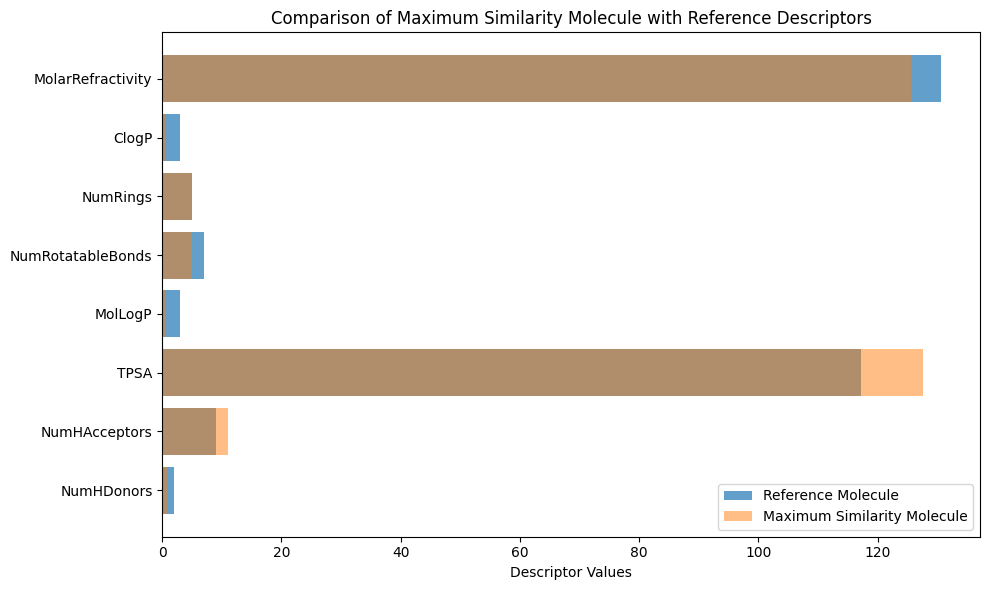

In [ ]:
# Plotting to compare the molecular descriptors of the reference molecule and the molecule with maximum similarity.
# Data for the molecule with the maximum value in 'OverallSimilarityToReference' column
max_similarity_row = data.loc[data['OverallSimilarityToReference'].idxmax()]

# Reference Descriptors
reference_descriptors = {
    'NumHDonors': 2,
    'NumHAcceptors': 9,
    'TPSA': 117.18,
    'MolLogP': 3.0549,
    'NumRotatableBonds': 7,
    'NumRings': 5,
    'ClogP': 3.0549,
    'MolarRefractivity': 130.6471
}

# Extracting relevant descriptors
reference_data = [reference_descriptors[key] for key in reference_descriptors]
molecule_data = [
    max_similarity_row['NumHDonors'],
    max_similarity_row['NumHAcceptors'],
    max_similarity_row['TPSA'],
    max_similarity_row['MolLogP'],
    max_similarity_row['NumRotatableBonds'],
    max_similarity_row['NumRings'],
    max_similarity_row['ClogP'],
    max_similarity_row['MolarRefractivity']
]

# Descriptor labels
descriptors = list(reference_descriptors.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(descriptors, reference_data, label='Reference Molecule', alpha=0.7)
plt.barh(descriptors, molecule_data, label='Maximum Similarity Molecule', alpha=0.5)
plt.xlabel('Descriptor Values')
plt.title('Comparison of Maximum Similarity Molecule with Reference Descriptors')
plt.legend()
plt.tight_layout()
plt.show()


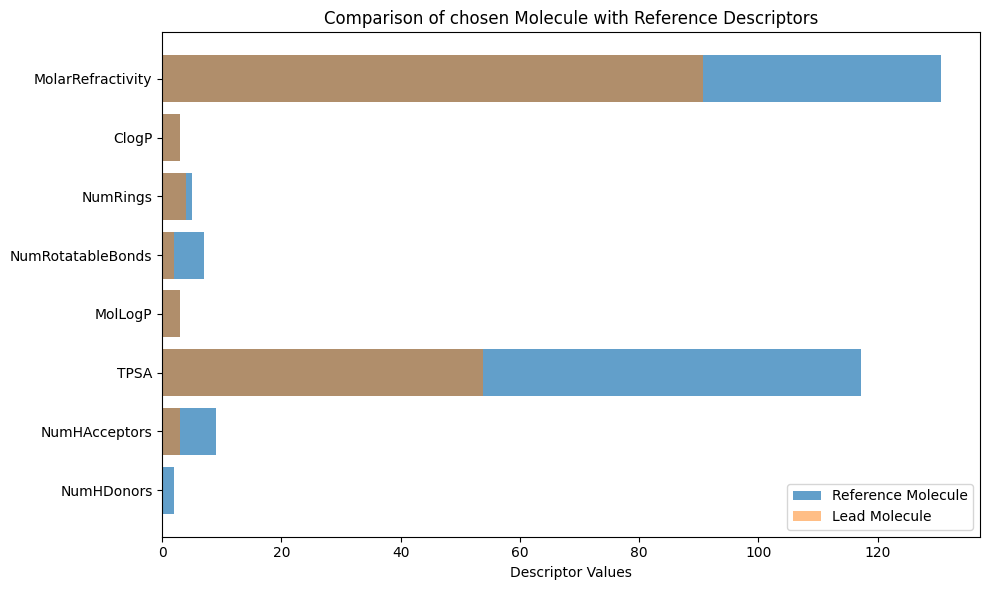

In [ ]:
#first molecule in the dataframe
first_row = data.iloc[0]

# Reference Descriptors
reference_descriptors = {
    'NumHDonors': 2,
    'NumHAcceptors': 9,
    'TPSA': 117.18,
    'MolLogP': 3.0549,
    'NumRotatableBonds': 7,
    'NumRings': 5,
    'ClogP': 3.0549,
    'MolarRefractivity': 130.6471
}

# Extracting relevant descriptors
reference_data = [reference_descriptors[key] for key in reference_descriptors]
molecule_data = [
    first_row['NumHDonors'],
    first_row['NumHAcceptors'],
    first_row['TPSA'],
    first_row['MolLogP'],
    first_row['NumRotatableBonds'],
    first_row['NumRings'],
    first_row['ClogP'],
    first_row['MolarRefractivity']
]

# Descriptor labels
descriptors = list(reference_descriptors.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(descriptors, reference_data, label='Reference Molecule', alpha=0.7)
plt.barh(descriptors, molecule_data, label='Lead Molecule', alpha=0.5)
plt.xlabel('Descriptor Values')
plt.title('Comparison of chosen Molecule with Reference Descriptors')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Sorting and filtering data to focus on molecules with the highest similarity to reference, and saving to a text file.

# Filtering and sorting the DataFrame by 'OverallSimilarityToReference' for top 20 values
best_20 = data.sort_values('OverallSimilarityToReference', ascending=False)[:20]

# Extracting top 20 SMILES from the 'GeneratedSMILES' column
top_20_smiles = best_20['GeneratedSMILES'].tolist()

# Exporting to a text file
with open('top_20_smiles.txt', 'w') as file:
    for smile in top_20_smiles:
        file.write(smile + '\n')

# Displaying the first two SMILES for verification
print(top_20_smiles[0])  # First SMILE
print(top_20_smiles[1])  # Second SMILE

# Displaying the DataFrame of top 5 for reference
best_20


O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1ccc(Cl)cn1
Cc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc(Br)cc3)c(=O)c3c2ncn3C(C)C)cc1


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
572,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.229358,0.400427,0.456179,486.920,1,11,127.60,0.54680,5,5,0.54680,125.5337,0.391855,pubchem_best_4_MACCs
296,Cc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc(Br)cc3)c(=O)c3c2...,0.162393,0.454417,0.458615,510.392,1,7,90.92,3.69852,9,4,3.69852,131.6907,0.191533,B1_pubchem_250_MQN_ref
84,CCCc1nc2ccc(C(=O)NCc3ccccc3)cc2c(=N)n1Cc1ccc(I...,0.159664,0.297179,0.529401,536.417,2,4,70.77,5.05117,8,4,5.05117,135.4559,0.088168,B2_zinc_250_MQN_noref
251,Cc1cc(C)cc(NC(=O)Cn2c(=O)c3cc(C)ccc3n(Cc3ccc(I...,0.171171,0.495389,0.443175,553.400,1,5,73.10,4.38006,8,4,4.38006,140.0117,0.081746,B2_pubchem_250_MQN_noref
561,O=C1O[C@@H](COc2ccncn2)CN1c1ccc(N2CCN(c3ccc([N...,0.217391,0.326025,0.443412,494.483,0,9,114.17,3.25470,7,5,3.25470,129.0644,0.033240,pubchem_best_4_MQN
612,CNc1ncc2cc(-c3ccc(-c4ccc(Br)cc4)cc3)c(=O)n(C[C...,0.682927,0.748094,0.778443,522.403,2,8,104.29,3.62990,7,5,3.62990,135.5841,0.020861,pubchem_best_4_1024
513,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(F)cc3)cc3cnc(N...,0.483871,0.609335,0.569778,534.523,1,8,115.81,2.88350,6,6,2.88350,139.3474,0.012192,zinc_best_4_MACCs
584,CNc1ncc2cc(-c3ccc(-c4ccccc4)cc3)c(=O)n(C[C@H]3...,0.700000,0.782263,0.814983,443.507,2,8,104.29,2.86740,7,5,2.86740,127.8841,0.012169,pubchem_best_4_2048
19,N#Cc1ccc(N2CCN(c3ccc(N4C[C@H](COc5ccc(C#N)cn5)...,0.200000,0.348075,0.446734,498.518,0,9,105.72,3.26406,6,5,3.26406,133.3580,0.011324,B2_zinc_250_MQN
440,Cn1c(=O)c2c(nc(N3CCN(CC(N)=O)CC3)n2Cc2ccc(Cl)c...,0.232143,0.318453,0.496567,480.356,1,9,111.39,0.39610,7,4,0.39610,123.6264,0.010961,B1_pubchem_250_MACCs_ref


In [ ]:
# Filtering the DataFrame to include rows where 'OverallSimilarityToReference' is 0.8 or less
filtered_data = data[data['OverallSimilarityToReference'] <= 0.9]

# Sorting the filtered data in descending order of 'OverallSimilarityToReference'
sorted_filtered_data = filtered_data.sort_values('OverallSimilarityToReference', ascending=False)[:20]

# Extracting the top 5 SMILES from the 'GeneratedSMILES' column of the sorted, filtered DataFrame
top_5_smiles_filtered = sorted_filtered_data['GeneratedSMILES'].tolist()[:5]
sorted_filtered_data

,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
572,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.229358,0.400427,0.456179,486.920,1,11,127.60,0.54680,5,5,0.54680,125.5337,0.391855,pubchem_best_4_MACCs
296,Cc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc(Br)cc3)c(=O)c3c2...,0.162393,0.454417,0.458615,510.392,1,7,90.92,3.69852,9,4,3.69852,131.6907,0.191533,B1_pubchem_250_MQN_ref
84,CCCc1nc2ccc(C(=O)NCc3ccccc3)cc2c(=N)n1Cc1ccc(I...,0.159664,0.297179,0.529401,536.417,2,4,70.77,5.05117,8,4,5.05117,135.4559,0.088168,B2_zinc_250_MQN_noref
251,Cc1cc(C)cc(NC(=O)Cn2c(=O)c3cc(C)ccc3n(Cc3ccc(I...,0.171171,0.495389,0.443175,553.400,1,5,73.10,4.38006,8,4,4.38006,140.0117,0.081746,B2_pubchem_250_MQN_noref
561,O=C1O[C@@H](COc2ccncn2)CN1c1ccc(N2CCN(c3ccc([N...,0.217391,0.326025,0.443412,494.483,0,9,114.17,3.25470,7,5,3.25470,129.0644,0.033240,pubchem_best_4_MQN
612,CNc1ncc2cc(-c3ccc(-c4ccc(Br)cc4)cc3)c(=O)n(C[C...,0.682927,0.748094,0.778443,522.403,2,8,104.29,3.62990,7,5,3.62990,135.5841,0.020861,pubchem_best_4_1024
513,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(F)cc3)cc3cnc(N...,0.483871,0.609335,0.569778,534.523,1,8,115.81,2.88350,6,6,2.88350,139.3474,0.012192,zinc_best_4_MACCs
584,CNc1ncc2cc(-c3ccc(-c4ccccc4)cc3)c(=O)n(C[C@H]3...,0.700000,0.782263,0.814983,443.507,2,8,104.29,2.86740,7,5,2.86740,127.8841,0.012169,pubchem_best_4_2048
19,N#Cc1ccc(N2CCN(c3ccc(N4C[C@H](COc5ccc(C#N)cn5)...,0.200000,0.348075,0.446734,498.518,0,9,105.72,3.26406,6,5,3.26406,133.3580,0.011324,B2_zinc_250_MQN
440,Cn1c(=O)c2c(nc(N3CCN(CC(N)=O)CC3)n2Cc2ccc(Cl)c...,0.232143,0.318453,0.496567,480.356,1,9,111.39,0.39610,7,4,0.39610,123.6264,0.010961,B1_pubchem_250_MACCs_ref


In [ ]:
# Sorting and filtering data to focus on molecules with the highest SimilarityToReference score
data.sort_values('SimilarityToReference', ascending=False)[11:20]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
32,Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3ncccc3F)nc21,0.372340,0.577107,0.503944,416.243,1,6,72.70,4.5800,4,4,4.5800,107.7127,0.003514,B2_zinc_250_2048
42,CNc1ncc2cc(-c3cccc(C(=O)OC)c3)c(=O)n(C)c2n1,0.365591,0.595654,0.525755,324.340,1,7,86.11,1.8238,6,3,1.8238,91.1012,0.001993,B2_zinc_250_2048
527,CNc1nsc(-c2ccc(-c3ncccc3F)cc2)n1,0.364706,0.550165,0.495446,286.335,1,5,50.70,3.4479,4,3,3.4479,78.0807,0.001535,zinc_best_4_2048
26,Cn1c(-c2ccc(N3CCN(c4ccccn4)CC3)cc2)nc2ccn(C[C@...,0.361905,0.409365,0.438226,529.601,1,11,120.74,1.1840,7,6,1.1840,149.0104,0.009283,B2_zinc_250_MQN
35,Cn1c(=O)c(-c2ccccc2Cl)cc2cnc(Nc3ccccc3Cl)nc21,0.344444,0.648784,0.523415,397.265,1,5,59.81,5.0459,4,4,5.0459,109.9597,0.002623,B2_zinc_250_2048
171,CNc1ncc2c(=O)n(CC(=O)Nc3sccc3Cl)cnc2n1,0.336735,0.370646,0.423432,350.791,2,8,101.80,1.5818,5,3,1.5818,89.0984,0.002179,B2_pubchem_250_MACCs
136,CNCCn1nc(-c2ccc(Cl)c(Cl)c2)cc(-c2c(F)cccc2F)c1=O,0.319588,0.485207,0.483842,410.251,1,4,46.92,4.3817,6,3,4.3817,103.2317,0.002353,B2_pbchem_250_1024
174,CNc1nc(N)c2ncn(C3OC(COP(=O)(O)Oc4ccc(-c5ccccc5...,0.318584,0.341477,0.426009,528.462,5,13,187.10,1.9324,13,5,1.9324,133.4890,0.003030,B2_pubchem_250_MACCs
175,CNc1nc(N)c2ncn(C3OC(COP(=O)(O)Oc4ccc(-c5ccc(-c...,0.318584,0.374673,0.383787,604.560,5,13,187.10,3.5994,14,6,3.5994,158.9250,0.002122,B2_pubchem_250_MACCs


In [ ]:
# Sorting and filtering data to focus on molecules with the highest ESP score
data.sort_values('ESP', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
584,CNc1ncc2cc(-c3ccc(-c4ccccc4)cc3)c(=O)n(C[C@H]3...,0.700000,0.782263,0.814983,443.507,2,8,104.29,2.86740,7,5,2.86740,127.8841,0.012169,pubchem_best_4_2048
612,CNc1ncc2cc(-c3ccc(-c4ccc(Br)cc4)cc3)c(=O)n(C[C...,0.682927,0.748094,0.778443,522.403,2,8,104.29,3.62990,7,5,3.62990,135.5841,0.020861,pubchem_best_4_1024
34,CNc1ncc2cc(-c3ccccc3Cl)c(=O)n(C)c2n1,0.416667,0.679713,0.596238,300.749,1,5,59.81,2.69060,4,3,2.69060,84.7717,0.001909,B2_zinc_250_2048
35,Cn1c(=O)c(-c2ccccc2Cl)cc2cnc(Nc3ccccc3Cl)nc21,0.344444,0.648784,0.523415,397.265,1,5,59.81,5.04590,4,4,5.04590,109.9597,0.002623,B2_zinc_250_2048
105,CNc1ncc2cc(-c3c(F)cccc3Cl)c(=O)n(C)c2n1,0.420455,0.643776,0.589356,318.739,1,5,59.81,2.82970,4,3,2.82970,84.7297,0.002080,B2_zinc_250_1024
39,NC1CO[CH]OC1,0.187500,0.642976,0.210831,102.113,1,3,44.48,-0.52021,1,1,-0.52021,24.1794,0.000443,B2_zinc_250_2048
513,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(F)cc3)cc3cnc(N...,0.483871,0.609335,0.569778,534.523,1,8,115.81,2.88350,6,6,2.88350,139.3474,0.012192,zinc_best_4_MACCs
151,Cc1ccccc1N1CC(C(=O)N2CCN(c3ncccc3F)CC2)CC1=O,0.214953,0.604596,0.556914,382.439,0,4,56.75,2.23082,4,4,2.23082,104.6270,0.001469,B2_zinc_250_1024_noref
42,CNc1ncc2cc(-c3cccc(C(=O)OC)c3)c(=O)n(C)c2n1,0.365591,0.595654,0.525755,324.340,1,7,86.11,1.82380,6,3,1.82380,91.1012,0.001993,B2_zinc_250_2048
38,CNc1nc2cc(-c3c(Cl)cccc3Cl)c(=O)n(C)c2o1,0.263158,0.594532,0.528518,324.167,1,5,60.06,3.54200,4,3,3.54200,84.2527,0.001333,B2_zinc_250_2048


In [ ]:
# Sorting and filtering data to focus on molecules with the highest shape score
data.sort_values('shape', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
584,CNc1ncc2cc(-c3ccc(-c4ccccc4)cc3)c(=O)n(C[C@H]3...,0.700000,0.782263,0.814983,443.507,2,8,104.29,2.8674,7,5,2.8674,127.8841,0.012169,pubchem_best_4_2048
612,CNc1ncc2cc(-c3ccc(-c4ccc(Br)cc4)cc3)c(=O)n(C[C...,0.682927,0.748094,0.778443,522.403,2,8,104.29,3.6299,7,5,3.6299,135.5841,0.020861,pubchem_best_4_1024
611,CNc1ncc2nc(-c3ccc(-c4ccc(Br)cc4)cc3)c(=O)n(C)c2n1,0.304348,0.454751,0.672941,422.286,1,6,72.70,3.8617,5,4,3.8617,110.6927,0.003022,pubchem_best_4_1024
50,O=C(c1ccccc1)N1CCN(c2nc3ccccc3n(Cc3ccccc3)c2=O...,0.152381,0.263349,0.647928,424.504,0,5,58.44,3.4072,4,5,3.4072,126.1055,0.001367,B2_zinc_250_2048_noref
601,CNc1ncc2cc(-c3cc(F)c(OC)cc3Cl)c(=O)n(C)c2n1,0.433333,0.428533,0.634629,348.765,1,6,69.04,2.8383,6,3,2.8383,91.2817,0.002567,pubchem_best_4_1024
451,O=C(NCc1ccc(F)cc1)C1CCN(c2nc3cccnc3n(Cc3ccccc3...,0.232143,0.273630,0.603274,471.536,1,6,80.12,3.5117,6,5,3.5117,132.5257,0.003910,B1_pubchem_250_2048_ref
504,Cn1cc(-c2ccc3c(c2)ncn3-c2cc(-c3ccc(F)cc3)nc(-c...,0.145455,0.077690,0.600623,464.479,0,6,61.42,5.8282,5,6,5.8282,129.6500,0.001682,zinc_best_4_MQN
454,O=C(Nc1ccccc1F)C1CCN(c2nc3cccnc3n(Cc3ccc(Br)cc...,0.250000,0.362110,0.600079,536.405,1,6,80.12,4.5965,5,5,4.5965,137.0087,0.003728,B1_pubchem_250_2048_ref
87,c1ccc(N2CCN(c3nc4ccccc4n4cccc34)CC2)cc1,0.100000,0.373463,0.599076,328.419,0,4,23.78,3.8141,2,5,3.8141,103.5660,0.000461,B2_zinc_250_MQN_noref
34,CNc1ncc2cc(-c3ccccc3Cl)c(=O)n(C)c2n1,0.416667,0.679713,0.596238,300.749,1,5,59.81,2.6906,4,3,2.6906,84.7717,0.001909,B2_zinc_250_2048


In [ ]:
# Sorting and filtering data to focus on molecules with the highest TPSA score
data.sort_values('TPSA', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
132,CNc1ncnc2c1ncn2C1OC(CO[PH](=O)O)C(COP(=O)(O)OP...,0.217742,0.335568,0.328690,1008.404,10,34,467.82,-0.3909,31,6,-0.3909,196.9888,0.000304,B2_pubchem_250_2048_noref
370,O=c1ccn(C2OCC(COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=...,0.159292,0.369278,0.353391,774.030,9,27,419.26,-0.7806,24,2,-0.7806,124.6426,0.000312,B1_zinc_250_1024
267,CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(CC(=O)O)C(=...,0.116788,0.317818,0.276993,1023.092,14,15,392.75,-1.1488,41,2,-1.1488,256.9557,0.000175,B1_pubchem_250_MQN
133,CNc1ncnc2c1ncn2C1OC(CO[PH](=O)O)C(COP(=O)(O)OP...,0.218487,0.260266,0.468599,665.168,7,23,326.97,-0.0330,21,3,-0.0330,121.5520,0.000637,B2_pubchem_250_2048_noref
501,O=P(O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O,0.033708,0.234776,0.398429,417.910,7,16,263.88,-0.4606,15,0,-0.4606,57.9041,0.000143,zinc_best_4_MQN
291,CC(C)CC(NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(N)Cc...,0.141732,0.323054,0.297513,896.106,9,7,246.19,3.8585,27,6,3.8585,255.4137,0.000310,B1_pubchem_250_MQN_ref
500,O=P(O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O,0.033708,0.350308,0.380442,337.931,6,13,217.35,-0.5776,12,0,-0.5776,46.9938,0.000147,zinc_best_4_MQN
215,CCn1c(=O)c2[nH]c(-c3ccc(-c4ccc(C(=O)NC(CCC(=O)...,0.166667,0.166516,0.410334,555.484,5,11,196.61,1.8756,13,4,1.8756,142.3088,0.001298,B2_pubchem_250_MQN
175,CNc1nc(N)c2ncn(C3OC(COP(=O)(O)Oc4ccc(-c5ccc(-c...,0.318584,0.374673,0.383787,604.560,5,13,187.10,3.5994,14,6,3.5994,158.9250,0.002122,B2_pubchem_250_MACCs
174,CNc1nc(N)c2ncn(C3OC(COP(=O)(O)Oc4ccc(-c5ccccc5...,0.318584,0.341477,0.426009,528.462,5,13,187.10,1.9324,13,5,1.9324,133.4890,0.003030,B2_pubchem_250_MACCs


In [ ]:
#Print the top SMILE
top_smile = best_20.iloc[0, best_20.columns.get_loc('GeneratedSMILES')]
top_smile

'O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1ccc(Cl)cn1'

In [ ]:
# Save top SMILE to a file named 'output.smi'
with open('output.smi', 'w') as file:
    file.write(value)

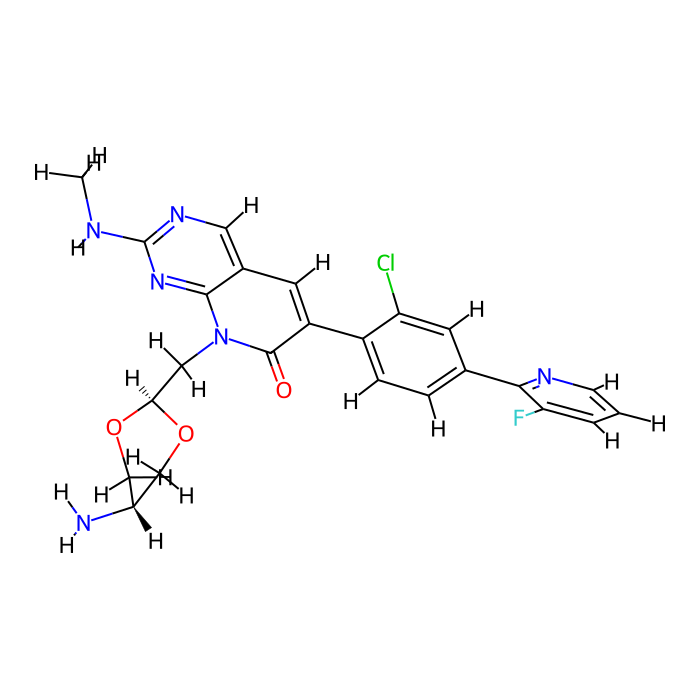

In [ ]:
# Converting a SMILES string to a molecule and visualizing it
# !pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

# smiles_string = top_smile
# Generate 3D structure
# Your ML-generated SMILES string
smiles_string = "CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@H](N)CO3)c2n1"
mol = Chem.MolFromSmiles(smiles_string)
mol = Chem.AddHs(mol)

# Experiment with different parameters
AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters

# Visualize the 3D structure
img = Draw.MolToImage(mol, size=(700, 700))
display(img)


In [ ]:
# Additional visualization in 3D.
!pip install py3Dmol

from IPython.display import display, HTML
import py3Dmol
# Visualize the 3D structure
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(Chem.MolToMolBlock(mol), "mol")
viewer.setStyle({'stick': {}})
viewer.setBackgroundColor('white')
viewer.zoomTo()
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

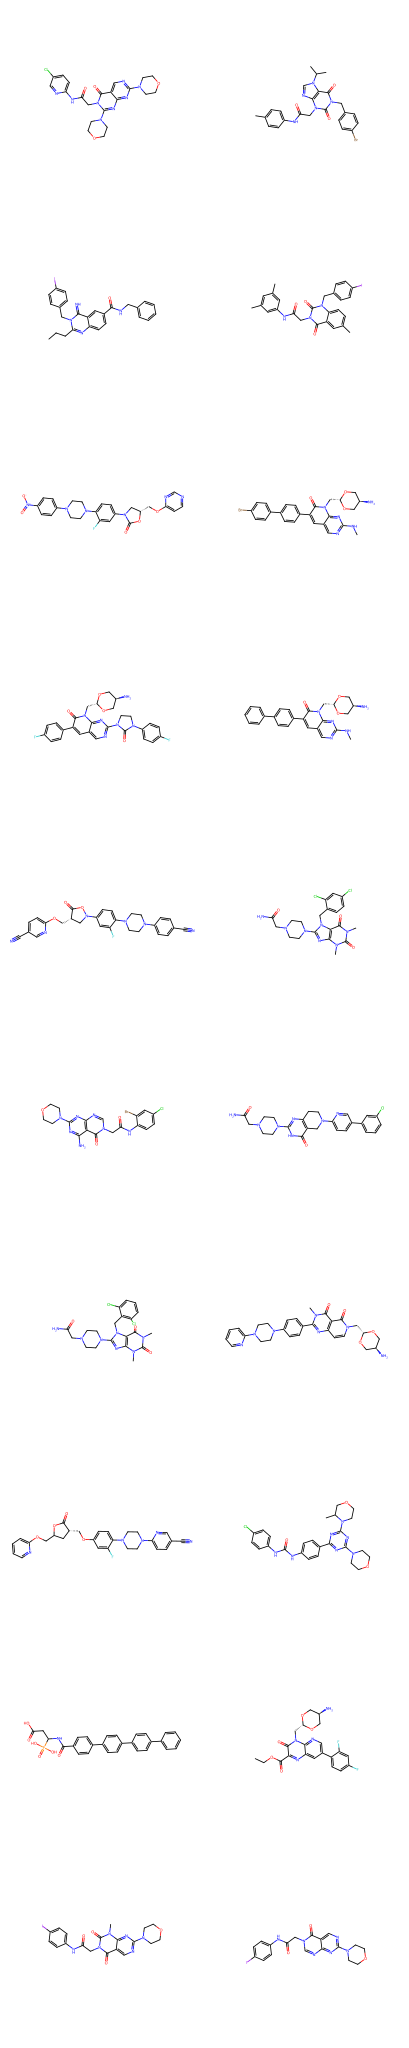

In [ ]:
# Convert top 20 SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smile) for smile in top_5_smiles]

# Draw the 2D structures of the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=2, subImgSize=(500, 500), useSVG=True)
display(img)

In [ ]:
# Save to SDF file
sdf_file = "output.sdf"
w_sdf = Chem.SDWriter(sdf_file)
w_sdf.write(mol)
w_sdf.close()


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn


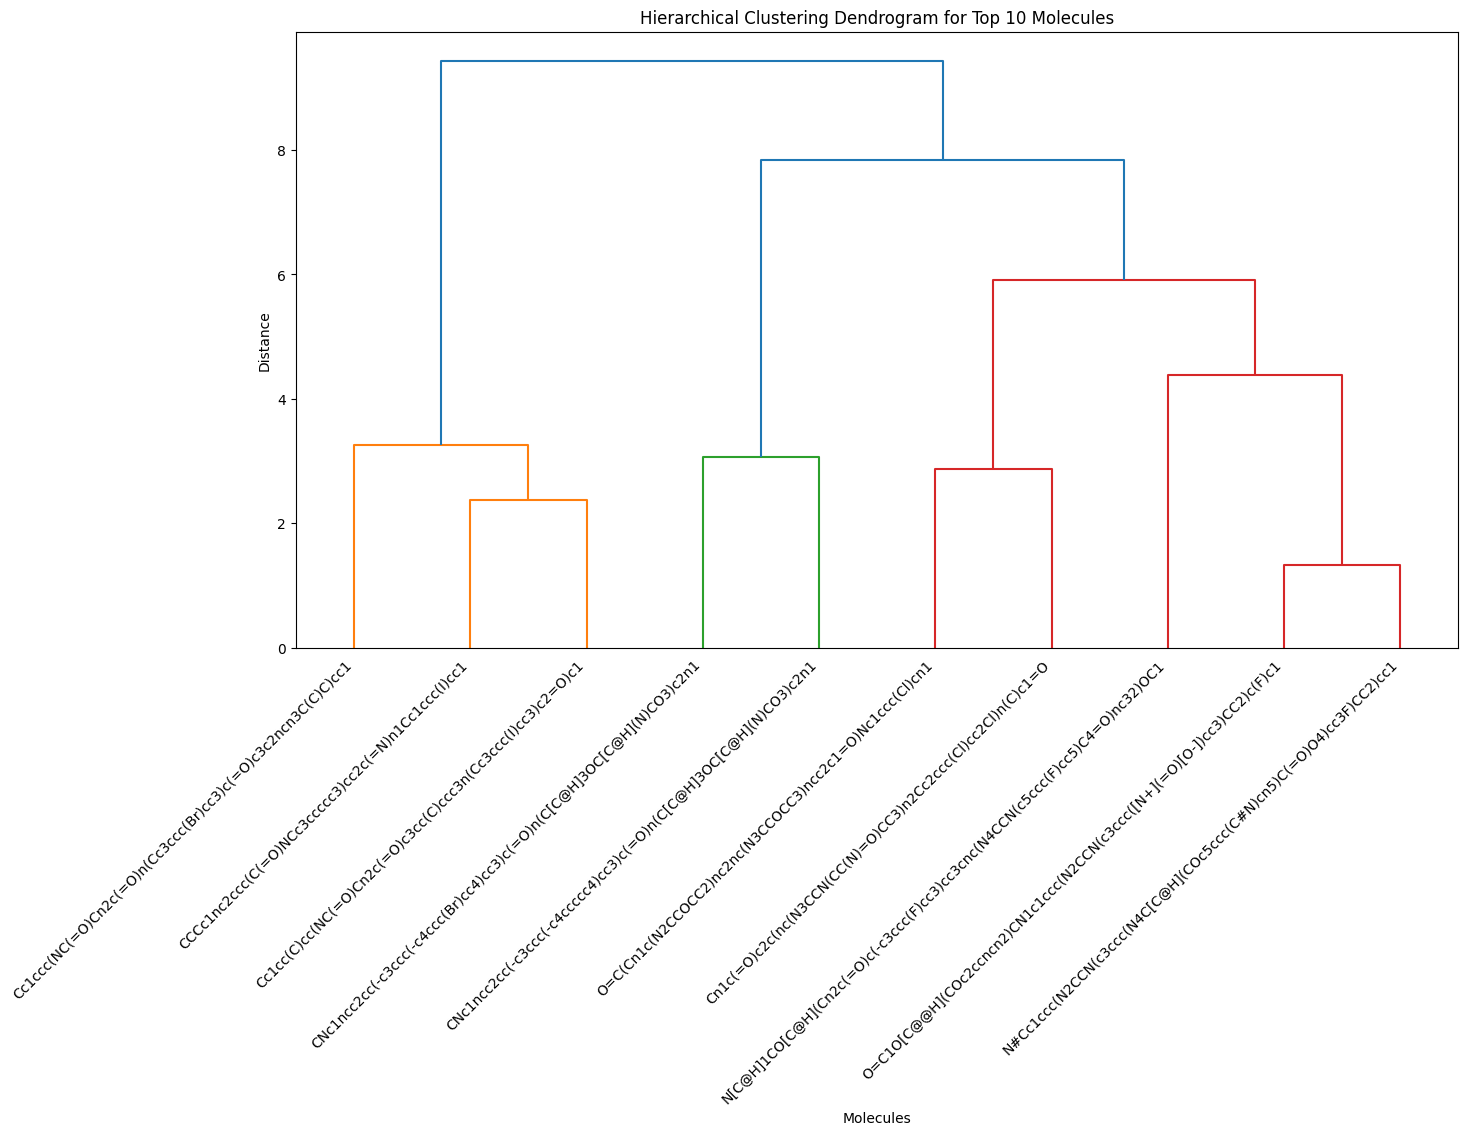


Cluster 1:
572    O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...
561    O=C1O[C@@H](COc2ccncn2)CN1c1ccc(N2CCN(c3ccc([N...
513    N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(F)cc3)cc3cnc(N...
19     N#Cc1ccc(N2CCN(c3ccc(N4C[C@H](COc5ccc(C#N)cn5)...
440    Cn1c(=O)c2c(nc(N3CCN(CC(N)=O)CC3)n2Cc2ccc(Cl)c...
Name: GeneratedSMILES, dtype: object

Average Values:
SimilarityToReference      0.272553
ESP                        0.400463
shape                      0.482534
MolecularWeight          498.960000
NumHDonors                 0.600000
NumHAcceptors              9.200000
TPSA                     114.938000
MolLogP                    2.069032
NumRotatableBonds          6.200000
NumRings                   5.000000
ClogP                      2.069032
MolarRefractivity        130.185980
dtype: float64

Cluster 2:
296    Cc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc(Br)cc3)c(=O)c3c2...
84     CCCc1nc2ccc(C(=O)NCc3ccccc3)cc2c(=N)n1Cc1ccc(I...
251    Cc1cc(C)cc(NC(=O)Cn2c(=O)c3cc(C)ccc3n(Cc3ccc(I...
Name: GeneratedSMIL

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-29-427658dea4f0>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-29-427658dea4f0>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-29-427658dea4f0>:52: FutureWarning: The default value of numeric_only in DataFra

In [ ]:
#cluster the data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load data
data = pd.read_csv('output_data.csv')

# Select the top 10 molecules based on 'OverallSimilarityToReference'
top_10 = data.nlargest(10, 'OverallSimilarityToReference')

# Extract relevant features for clustering
features = top_10[['SimilarityToReference', 'ESP', 'shape', 'MolecularWeight', 'NumHDonors', 'NumHAcceptors',
                   'TPSA', 'MolLogP', 'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate pairwise distances
distances = pdist(scaled_features, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=top_10['GeneratedSMILES'].tolist(), orientation='top', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecules')
plt.xlabel('Molecules')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

# Choose the number of clusters based on dendrogram or other criteria
num_clusters = 3  # Adjust as needed

# Perform clustering with AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
top_10['Cluster'] = cluster_model.fit_predict(scaled_features)

# Print the clustered molecules in the top 10
for cluster_id in range(num_clusters):
    cluster_data = top_10[top_10['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id + 1}:')
    print(cluster_data['GeneratedSMILES'])

    # Provide interpretation based on average values of features
    avg_values = cluster_data.mean()
    print('\nAverage Values:')
    print(avg_values[features.columns])
